In [172]:
import numpy as np
from matplotlib import pyplot as plt
import cvxopt
from cvxopt import matrix, solvers

In [173]:
Xsource_train = np.loadtxt("../UA-ECE523-EngrAppMLData/data/source_train.csv", delimiter=",")[:, :-1]
ysource_train = np.loadtxt("../UA-ECE523-EngrAppMLData/data/source_train.csv", delimiter=",")[:, -1]
Xtarget_train = np.loadtxt("../UA-ECE523-EngrAppMLData/data/target_train.csv", delimiter=",")[:, :-1]
ytarget_train = np.loadtxt("../UA-ECE523-EngrAppMLData/data/target_train.csv", delimiter=",")[:, -1]

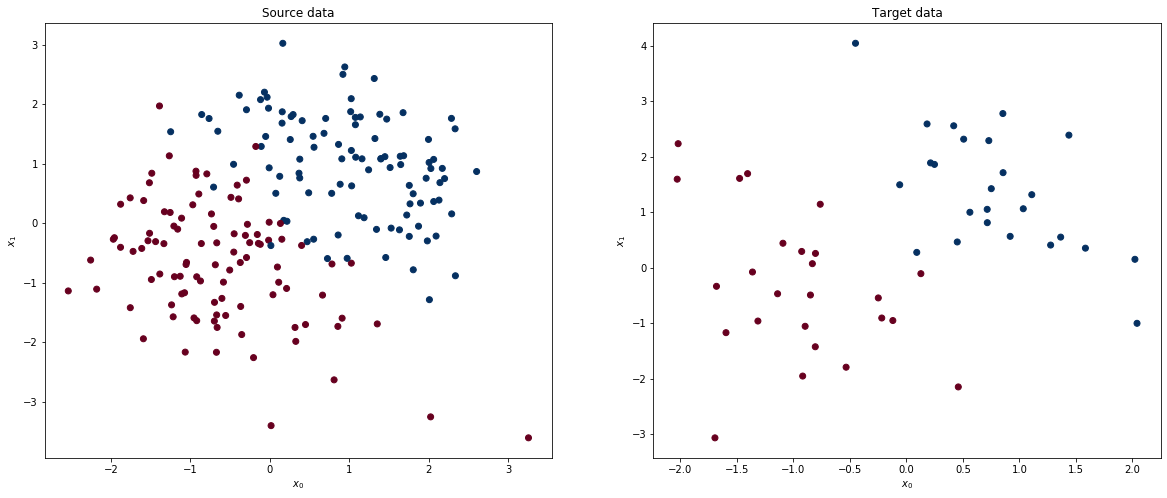

<Figure size 432x288 with 0 Axes>

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].scatter(Xsource_train[:, 0], Xsource_train[:, 1], c=ysource_train, cmap="RdBu")
ax[0].set_xlabel(r"$x_0$")
ax[0].set_ylabel(r"$x_1$")
ax[0].set_title(r"Source data")

ax[1].scatter(Xtarget_train[:, 0], Xtarget_train[:, 1], c=ytarget_train, cmap="RdBu")
ax[1].set_xlabel(r"$x_0$")
ax[1].set_ylabel(r"$x_1$")
ax[1].set_title(r"Target data")

plt.show()
plt.clf()

In [179]:
C = 1

P = np.zeros((np.size(ysource_train), np.size(ysource_train)))
for i in range(np.size(P, 0)):
    for j in range(np.size(P, 0)):
        P[i, j] = ysource_train[i] * ysource_train[j] * np.dot(Xsource_train[i], Xsource_train[j])
P = matrix(P, tc="d")

q = matrix(- np.ones_like(ysource_train), tc="d")

G = np.vstack((- np.diag(np.ones_like(ysource_train)), np.diag(np.ones_like(ysource_train))))
G = matrix(G, tc="d")

h = np.hstack((np.zeros_like(ysource_train), C * np.ones_like(ysource_train)))
h = matrix(h, tc="d")

A = matrix(ysource_train, (1, np.size(ysource_train)), tc="d")

b = matrix(0., tc="d")

sol = solvers.qp(P, q, G, h, A, b)

alpha = sol["x"].T

ws = np.array([0., 0.])
ws[0] = np.sum(alpha * ysource_train * Xsource_train[:, 0])
ws[1] = np.sum(alpha * ysource_train * Xsource_train[:, 1])

print("ws=", ws)

     pcost       dcost       gap    pres   dres
 0: -5.4527e+01 -4.1324e+02  2e+03  3e+00  4e-15
 1: -3.5700e+01 -2.3871e+02  4e+02  3e-01  3e-15
 2: -2.5093e+01 -5.7172e+01  5e+01  3e-02  7e-15
 3: -2.5903e+01 -3.2574e+01  9e+00  6e-03  4e-15
 4: -2.7004e+01 -2.8976e+01  2e+00  1e-03  3e-15
 5: -2.7351e+01 -2.8080e+01  9e-01  4e-04  3e-15
 6: -2.7552e+01 -2.7690e+01  2e-01  6e-05  3e-15
 7: -2.7589e+01 -2.7628e+01  4e-02  1e-05  3e-15
 8: -2.7603e+01 -2.7607e+01  5e-03  1e-06  3e-15
 9: -2.7605e+01 -2.7605e+01  5e-05  1e-08  3e-15
10: -2.7605e+01 -2.7605e+01  5e-07  1e-10  3e-15
Optimal solution found.
ws= [1.92786559 1.82082169]


In [180]:
B = 1

P = np.zeros((np.size(ytarget_train), np.size(ytarget_train)))
for i in range(np.size(P, 0)):
    for j in range(np.size(P, 0)):
        P[i, j] = ytarget_train[i] * ytarget_train[j] * np.dot(Xtarget_train[i], Xtarget_train[j])
P = matrix(P, tc="d")

q = np.zeros_like(ytarget_train)
for i in range(np.size(ytarget_train)):
    q[i] = - 1 + B * ytarget_train[i] * np.dot(ws, Xtarget_train[i])
q = matrix(q, tc="d")

G = np.vstack((- np.diag(np.ones_like(ytarget_train)), np.diag(np.ones_like(ytarget_train))))
G = matrix(G, tc="d")

h = np.hstack((np.zeros_like(ytarget_train), C * np.ones_like(ytarget_train)))
h = matrix(h, tc="d")

A = matrix(ytarget_train, (1, np.size(ytarget_train)), tc="d")

b = matrix(0., tc="d")

sol = solvers.qp(P, q, G, h, A, b)

alpha = sol["x"].T

wt = np.array([0., 0.])
wt[0] = np.sum(alpha * ytarget_train * Xtarget_train[:, 0]) + B * ws[0]
wt[1] = np.sum(alpha * ytarget_train * Xtarget_train[:, 1]) + B * ws[1]

print("wt=", wt)

     pcost       dcost       gap    pres   dres
 0: -1.0443e+01 -1.1542e+02  7e+02  3e+00  3e-16
 1: -5.5520e+00 -6.7448e+01  1e+02  4e-01  3e-16
 2: -7.2201e-01 -1.2869e+01  2e+01  4e-02  4e-15
 3: -1.2286e+00 -2.6601e+00  2e+00  3e-03  1e-15
 4: -1.5711e+00 -1.8573e+00  3e-01  5e-04  4e-16
 5: -1.6714e+00 -1.6775e+00  7e-03  6e-06  3e-16
 6: -1.6736e+00 -1.6737e+00  7e-05  6e-08  4e-16
 7: -1.6736e+00 -1.6736e+00  7e-07  6e-10  3e-16
Optimal solution found.
wt= [2.64808185 1.78022468]
